In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pmagpy.pmag as pmag
import pandas as pd
import scipy as sci
from scipy import interpolate

## User Inputs

In [18]:
site_lat = 40 #idk might have to do something to correct for negative values
site_lon = 50 
age_range = np.arange(0,70) #how far back in time do you want to run the code. Used in paleomag section when deciding which ages to pull from the databases
therm = False #does the user want the therm criteria (specified paleomag data)? Used in paleomag section
age = 290000 #approx age of sample, used in production rates calculation section
altitude = 100 #user input, in meters, for pressure correction. Used in pressure section
stdatm = 0 #user inputs 1 for standard, 0 for ERA40. Used in pressure section
w = 0.06; # water content, from 0-1. Used in production rates calculation
system = 1 #1 for qtz, 2 for cpx, 3 for olivine. Used in production rates calculation
age_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69])

## Paleointensity Section
- Cell 1: import paleomag (IAGA + Geomagia) database
- Cell 2: uses the user input values for lat/lon, determines what the paleolatitude variations have been from present to 70 Ma.
- Cell 3: saves only the paleolatitude values from the pmagpy data
- Cell 4: Based on the age_range specified by the user, code will drop any data points outside the age range.
    - This cell also includes any criteria specifications
- Cell 5: assigns bin_names in 5 myr increments to the dataset. 
- Cell 6: calculates mean VDM's for each 5 Myr bin, while also printing out how many datapoints were used to calculate this mean.

In [5]:
#CELL 1
Paleomag_database = pd.read_excel('Paleomag_database.xlsx') #excel sheet with all pmag data. 0-70 Ma, all criteria

In [6]:
#CELL 2
time = np.linspace(0,70,14) #will report paleolatitude values from 0-70 Million years ago, in 5 Myr increments 
vals = [] #storage for pmagpy data 
for i in time:
    data=['NA',site_lat,site_lon,i] # North American plate, lat and lon of San Diego at 100 Ma (user inputs lat and long of site of interest)
    pmag.apwp(data, print_results = False) #change to true if you want to see the output
    vals.append(pmag.apwp(data))
    

In [7]:
#CELL 3
df = pd.DataFrame(vals) #create a dataframe with the pmagpy data
df.columns = ['Age', 'Paleolat', 'Dec','Inc','Pole_lat','Pole_Long'] #rename the columns
Paleolat = df['Paleolat'] #call paleolat whenever you want all the paleolatitudes for some time frame
#Paleolat

In [8]:
#CELL 4
Paleomag_database.drop(Paleomag_database[Paleomag_database['AGE'] < age_range[0]].index, inplace = True) #age
Paleomag_database.drop(Paleomag_database[Paleomag_database['AGE'] > age_range[-1]].index, inplace = True) #age
Paleomag_database

#Criteria evaluation
pd.set_option("display.max_rows", None, "display.max_columns", None) # run this line if you want to see all the rows

#here, the user will input what sort of criteria they want on the paleomag data used to calculate Rc
#True = therm parameters, will only save the green bois
HeZ = Paleomag_database[Paleomag_database['IntM'] == '   HeZ       ' ].index
LTD_DHT_S = Paleomag_database[Paleomag_database['IntM'] == '   LTD-DHT-S ' ].index
M = Paleomag_database[Paleomag_database['IntM'] == '   M         ' ].index
MSPDp = Paleomag_database[Paleomag_database['IntM'] == '   MSPDp     ' ].index
ONR = Paleomag_database[Paleomag_database['IntM'] == '   ONR       ' ].index
S = Paleomag_database[Paleomag_database['IntM'] == '   S         ' ].index
ST = Paleomag_database[Paleomag_database['IntM'] == '   ST        ' ].index
SW = Paleomag_database[Paleomag_database['IntM'] == '   SW        ' ].index
TZ = Paleomag_database[Paleomag_database['IntM'] == '   TZ        ' ].index
Tminus = Paleomag_database[Paleomag_database['IntM'] == '   T-        ' ].index
W = Paleomag_database[Paleomag_database['IntM'] == '   W         ' ].index
WB = Paleomag_database[Paleomag_database['IntM'] == '   WB        ' ].index
WZ = Paleomag_database[Paleomag_database['IntM'] == '   WZ        ' ].index
Z = Paleomag_database[Paleomag_database['IntM'] == '   Z         ' ].index
Tv = Paleomag_database[Paleomag_database['IntM'] == '   Tv        ' ].index

if therm == True: 
    #the following lines index string values (criteria from excel sheet). Spaces are indicative of how the names are stored in the excel sheet.
    #Delete these row indexes from dataFrame
    Paleomag_database.drop(HeZ, inplace=True)
    Paleomag_database.drop(LTD_DHT_S, inplace=True)
    Paleomag_database.drop(M, inplace=True)
    Paleomag_database.drop(MSPDp, inplace=True)
    Paleomag_database.drop(ONR, inplace=True)
    Paleomag_database.drop(S, inplace=True)
    Paleomag_database.drop(ST, inplace=True)
    Paleomag_database.drop(SW, inplace=True)
    Paleomag_database.drop(TZ, inplace=True)
    Paleomag_database.drop(Tv, inplace=True)
    Paleomag_database.drop(Tminus, inplace=True)
    Paleomag_database.drop(W, inplace=True)
    Paleomag_database.drop(WB, inplace=True)
    Paleomag_database.drop(WZ, inplace=True)
    Paleomag_database.drop(Z, inplace=True)
#Paleomag_database #slight problem with this: if you change True to False, you have to re-run the code from the beginning (probably something to do with the order these are written in, not refreshing things)\


In [9]:
#CELL 5
bin_1 = Paleomag_database[Paleomag_database['AGE'] <= 0.05]
bin_2 = Paleomag_database[(Paleomag_database['AGE'] <= 5) & (Paleomag_database['AGE'] > 0.05)]
bin_3 = Paleomag_database[(Paleomag_database['AGE'] <= 10) & (Paleomag_database['AGE'] > 5)]
bin_4 = Paleomag_database[(Paleomag_database['AGE'] <= 15) & (Paleomag_database['AGE'] > 10)]
bin_5 = Paleomag_database[(Paleomag_database['AGE'] <= 20) & (Paleomag_database['AGE'] > 15)]
bin_6 = Paleomag_database[(Paleomag_database['AGE'] <= 25) & (Paleomag_database['AGE'] > 20)]
bin_7 = Paleomag_database[(Paleomag_database['AGE'] <= 30) & (Paleomag_database['AGE'] > 25)]
bin_8 = Paleomag_database[(Paleomag_database['AGE'] <= 35) & (Paleomag_database['AGE'] > 30)]
bin_9 = Paleomag_database[(Paleomag_database['AGE'] <= 40) & (Paleomag_database['AGE'] > 35)]
bin_10 = Paleomag_database[(Paleomag_database['AGE'] <= 45) & (Paleomag_database['AGE'] > 40)]
bin_11 = Paleomag_database[(Paleomag_database['AGE'] <= 50) & (Paleomag_database['AGE'] > 45)]
bin_12 = Paleomag_database[(Paleomag_database['AGE'] <= 55) & (Paleomag_database['AGE'] > 50)]
bin_13 = Paleomag_database[(Paleomag_database['AGE'] <= 60) & (Paleomag_database['AGE'] > 55)]
bin_14 = Paleomag_database[(Paleomag_database['AGE'] <= 65) & (Paleomag_database['AGE'] > 60)]
bin_15 = Paleomag_database[(Paleomag_database['AGE'] <= 70) & (Paleomag_database['AGE'] > 65)]

In [10]:
#CELL 6
means = []
median = []
bin_1 = bin_1[pd.to_numeric(bin_1['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_1['VDM'] = bin_1['VDM'].astype(float)
means.append((bin_1["VDM"].mean()))#calculates mean
median.append(bin_1['VDM'].median())
index_1 = bin_1.index
n_1 = len(index_1)
print('The number of data points from present to 0.05 Ma is', n_1)

bin_2 = bin_2[pd.to_numeric(bin_2['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_2['VDM'] = bin_2['VDM'].astype(float)
means.append((bin_2["VDM"].mean()))#calculates mean
median.append(bin_2['VDM'].median())
index_2 = bin_2.index
n_2 = len(index_2)
print('The number of data points from 0.05 to 5 Ma is', n_2)

bin_3 = bin_3[pd.to_numeric(bin_3['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_3['VDM'] = bin_3['VDM'].astype(float)
means.append((bin_3["VDM"].mean()))#calculates mean
median.append(bin_3['VDM'].median())
index_3 = bin_3.index
n_3 = len(index_3)
print('The number of data points from 5 to 10 Ma is', n_3)

bin_4 = bin_4[pd.to_numeric(bin_4['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_4['VDM'] = bin_4['VDM'].astype(float)
means.append((bin_4["VDM"].mean()))#calculates mean
median.append(bin_4['VDM'].median())
index_4 = bin_4.index
n_4 = len(index_4)
print('The number of data points from 10 to 15 Ma is', n_4)

bin_5 = bin_5[pd.to_numeric(bin_5['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_5['VDM'] = bin_5['VDM'].astype(float)
means.append((bin_5["VDM"].mean()))#calculates mean
median.append(bin_5['VDM'].median())
index_5 = bin_5.index
n_5 = len(index_5)
print('The number of data points from 15 to 20 Ma is', n_5)

bin_6 = bin_6[pd.to_numeric(bin_6['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_6['VDM'] = bin_6['VDM'].astype(float)
means.append((bin_6["VDM"].mean()))#calculates mean
median.append(bin_6['VDM'].median())
index_6 = bin_6.index
n_6 = len(index_6)
print('The number of data points from 20 to 25 Ma is', n_6)

bin_7 = bin_7[pd.to_numeric(bin_7['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_7['VDM'] = bin_7['VDM'].astype(float)
means.append((bin_7["VDM"].mean()))#calculates mean
median.append(bin_7['VDM'].median())
index_7 = bin_7.index
n_7 = len(index_7)
print('The number of data points from 25 to 30 Ma is', n_7)

bin_8 = bin_8[pd.to_numeric(bin_8['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_8['VDM'] = bin_8['VDM'].astype(float)
means.append((bin_8["VDM"].mean()))#calculates mean
median.append(bin_8['VDM'].median())
index_8 = bin_8.index
n_8 = len(index_8)
print('The number of data points from 30 to 35 Ma is', n_8)

bin_9 = bin_9[pd.to_numeric(bin_9['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_9['VDM'] = bin_9['VDM'].astype(float)
means.append((bin_9["VDM"].mean()))#calculates mean
median.append(bin_9['VDM'].median())
index_9 = bin_9.index
n_9 = len(index_9)
print('The number of data points from 35 to 40 Ma is', n_9)

bin_10 = bin_10[pd.to_numeric(bin_10['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_10['VDM'] = bin_10['VDM'].astype(float)
means.append((bin_10["VDM"].mean()))#calculates mean
median.append(bin_10['VDM'].median())
index_10 = bin_10.index
n_10 = len(index_10)
print('The number of data points from 40 to 45 Ma is', n_10)

bin_11 = bin_11[pd.to_numeric(bin_11['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_11['VDM'] = bin_11['VDM'].astype(float)
means.append((bin_11["VDM"].mean()))#calculates mean
median.append(bin_11['VDM'].median())
index_11 = bin_11.index
n_11 = len(index_11)
print('The number of data points from 45 to 50 Ma is', n_11)

bin_12 = bin_12[pd.to_numeric(bin_12['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_12['VDM'] = bin_12['VDM'].astype(float)
means.append((bin_12["VDM"].mean()))#calculates mean
median.append(bin_12['VDM'].median())
index_12 = bin_12.index
n_12 = len(index_12)
print('The number of data points from 50 to 55 Ma is', n_12)

bin_13 = bin_13[pd.to_numeric(bin_13['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_13['VDM'] = bin_13['VDM'].astype(float)
means.append((bin_13["VDM"].mean()))#calculates mean
median.append(bin_13['VDM'].median())
index_13 = bin_13.index
n_13 = len(index_13)
print('The number of data points from 55 to 60 Ma is', n_13)

bin_14 = bin_14[pd.to_numeric(bin_14['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_14['VDM'] = bin_14['VDM'].astype(float)
means.append((bin_14["VDM"].mean()))#calculates mean
median.append(bin_14['VDM'].median())
index_14 = bin_14.index
n_14 = len(index_14)
print('The number of data points from 60 to 65 Ma is', n_14)

bin_15 = bin_15[pd.to_numeric(bin_15['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_15['VDM'] = bin_15['VDM'].astype(float)
means.append((bin_15["VDM"].mean()))#calculates mean
median.append(bin_15['VDM'].median())
index_15 = bin_15.index
n_15 = len(index_15)
print('The number of data points from 65 to 70 Ma is', n_15)

The number of data points from present to 0.05 Ma is 6806
The number of data points from 0.05 to 5 Ma is 1733
The number of data points from 5 to 10 Ma is 174
The number of data points from 10 to 15 Ma is 201
The number of data points from 15 to 20 Ma is 86
The number of data points from 20 to 25 Ma is 17
The number of data points from 25 to 30 Ma is 48
The number of data points from 30 to 35 Ma is 69
The number of data points from 35 to 40 Ma is 37
The number of data points from 40 to 45 Ma is 31
The number of data points from 45 to 50 Ma is 22
The number of data points from 50 to 55 Ma is 16
The number of data points from 55 to 60 Ma is 43
The number of data points from 60 to 65 Ma is 112
The number of data points from 65 to 70 Ma is 55


## Cutoff Rigidty (Rc) Calculation
- Uses the paleolatitude values from the paleomagnetism section to calculate Rc
- Based on 6th order polynomial from Lifton (2014) 

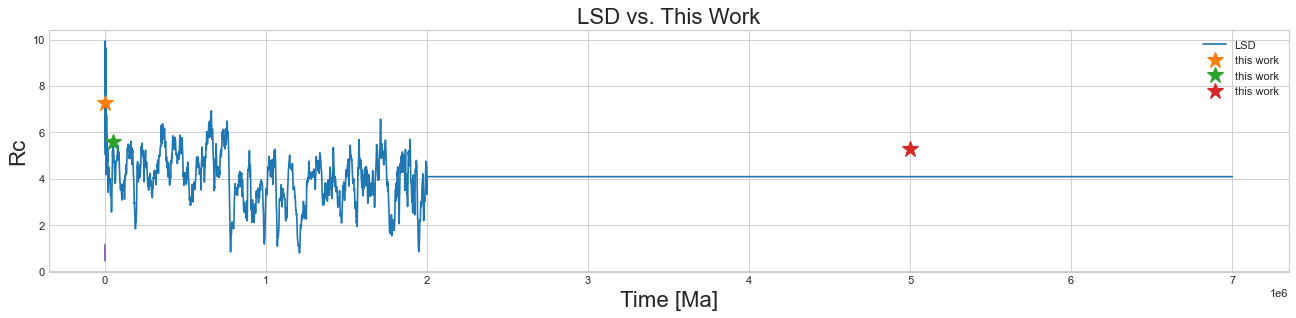

In [92]:
M0 = 7.95 #[*10^22 Am^2], per Katie. constant, magnetic moment today for reference field.
Rc = []
temp = []
for i in range(len(Paleolat)): 
    Rc_calc = (means[i]/M0)*(6.89901*np.cos(np.deg2rad(Paleolat[i])) - 103.241*(np.cos(np.deg2rad(Paleolat[i])))**2 + 522.061*(np.cos(np.deg2rad(Paleolat[i])))**3 - 1152.15*(np.cos(np.deg2rad(Paleolat[i])))**4 + 1189.18*(np.cos(np.deg2rad(Paleolat[i])))**5 - 448.004*(np.cos(np.deg2rad(Paleolat[i])))**6)  #from Lifton (2014)
    Rc.append(Rc_calc)
    temp.append(means[i]/M0)
from matplotlib.pyplot import figure

plt.show()
plt.style.use('seaborn-whitegrid')
temp_Rc = pd.read_csv('temp_Rc', header = None)
temp_tv = pd.read_csv('temp_tv', header = None)
figure(figsize=(20, 4), dpi=80)

plt.plot(temp_tv,temp_Rc, label = 'LSD')
plt.plot(0, Rc[0], '*', markersize=15, label = 'this work')
plt.plot(0.05e6, Rc[1], '*',markersize=15, label = 'this work')
plt.plot(5e6, Rc[2], '*',markersize=15, label = 'this work')
plt.xlabel('Time [Ma]', fontsize=20)
plt.ylabel('Rc', fontsize=20)
plt.title('LSD vs. This Work', fontsize=20)
plt.legend()

In [93]:
print(temp)

[1.1638217850694057, 0.8323843119322654, 0.7800910865322053, 0.6080290372039174, 0.5195261079420797, 0.532741398446171, 0.6957547169811321, 0.46285662200346356, 0.5187829338772736, 0.6739703793872994, 1.0440251572327042, 0.5400943396226414, 0.9015650138949831, 0.7174303683737648]


## Pressure Corrections
- Cell 1: Reads in ERA40 reanalysis data (imports text files, retrieved from LSD code)
    - then uses 2D interpolation to determine a site_pressure
    - uses user input of site_lat, site_lon, and altitude
    - converts altitdue to atmospheric depth (g/cm2)
    - the ERA40 reanalysis will run if the user specifies at the beginning that stdatm = 0
    - if not, it will run a standard atmospheric equation instead to assign a site_pressure for the p-rate code.

In [12]:
ERA40lat = pd.read_csv('ERA40lat', header=None)
ERA40lon = pd.read_csv('ERA40lon', header=None)
meanT = pd.read_csv('meanT', header=None)
meanP = pd.read_csv('meanP', header=None) 
x = ERA40lat.to_numpy()
y = ERA40lon.to_numpy()
z = meanT.to_numpy()
a = meanP.to_numpy()
gmr = -0.03417; # Assorted constants
dtdz = 0.0065; # Lapse rate from standard atmosphere
altitude_updated = altitude * 1.019716

t = sci.interpolate.interp2d(y,x,z)
site_T = t(site_lat, site_lon)
site_T_degK = site_T + 273.15
p = sci.interpolate.interp2d(y,x,a)
site_slp = p(site_lat, site_lon)

#Lifton Lapse Rate Fit to COSPAR CIRA-86 <10 km altitude

lr = [-6.1517E-03, -3.1831E-06, -1.5014E-07, 1.8097E-09, 1.1791E-10, -6.5359E-14, -9.5209E-15]

dtdz = lr[0] + lr[1]*site_lat + lr[2]*site_lat**2 + lr[3]*site_lat**3 + lr[4]*site_lat**4 + lr[5]*site_lat**5 + lr[6]*site_lat**6;
dtdz = -dtdz

# Calculate site pressure using the site-specific SLP and T1000 with the
# standard atmosphere equation.

if stdatm == 0: #ERA40
    sample_pressure = site_slp * np.exp( (gmr/dtdz) * (np.log(site_T) - np.log(site_T - (altitude_updated*dtdz)) ) )
    sample_pressure = float(sample_pressure)
else: #standard
    sample_pressure = 1013.25 * np.exp((gmr/dtdz)*(np.log(288.15) - np.log(288.15 - (altitude_updated*dtdz))))
#Nat's Code gives: 1.0047e03 for site_lat = 40, site_lon = 50, altitude = 100 (for ERA40)

sample_pressure

1004.8976698251095

## Solar Modulation Parameter
- need to add (as of 6/22) 

In [90]:
SPhi = pd.read_csv('SPhi', header=None) #Same as above
SPhiInf = 462.036146906888
tv1 = np.linspace(0,50,10)
tv2 = np.linspace(60,50060,100)
tv3 = np.linspace(51060,2000060,1000)
tv4 = np.linspace(10**6.30126011076, 10**7.84509804001, 200)
import itertools
tv = list(itertools.chain(tv1, tv2, tv3, tv4))
age = 50000000
clipindex = next(x for x, val in enumerate(tv) if val > age)
tv2 = tv[:clipindex]
#solar modulation parameter
this_SPhi = np.zeros((len(tv),1)) + int(SPhiInf) #needs to be size of tv, solar modulation potential sato et al 2008
elements = len(tv)
A = SPhi.to_numpy()
this_SPhi[:120] = A
from scipy.interpolate import interp1d
set_interp = interp1d(tv, this_SPhi, axis = 0)
new_y = set_interp(tv2)
#Nat: LSDSPhi = interp1(tv, this_SPhi, tv2)
new_y

array([[624.57175221],
       [689.15780028],
       [842.29421311],
       ...,
       [462.        ],
       [462.        ],
       [462.        ]])

## Production Rates Calculation
- Cell 1: Imports necessary csv files: nuclear rxn cross sections specific for 3He, energy spectra data, etc. 
- Cell 2: Essentially LSD code (Neutrons.m) converted to Python
    - Computes production rate of 3He in either qtz, cpx, or olivine 
    - will determine which scheme to use based on user input of system = 1, 2, or 3. 
    - "p3n" will return the production rate for each 5 Myr bin. 

In [14]:
Onx3HeT = pd.read_csv('Onx3HeT', header = None)
Sinx3HeT = pd.read_csv('Sinx3HeT', header=None) #Same as above
Fenx3HeT = pd.read_csv('Fenx3HeT', header=None)
Canx3HeT = pd.read_csv('Canx3HeT', header=None)
Mgnx3HeT = pd.read_csv('Mgnx3HeT', header=None)
Alnx3HeT = pd.read_csv('Mgnx3HeT', header=None)
a_values = pd.read_csv('a_values', header=None)
b_values = pd.read_csv('b_values', header=None)
basic_spectrum = pd.read_csv('basic_spectrum',header=None)
c_values = pd.read_csv('c_values', header=None)
ground_level_spectrum = pd.read_csv('ground_level_spectrum',header=None)
thermal_neutron_spectrum = pd.read_csv('thermal_neutron_spectrum',header=None)
a_values.columns = ['variable','values']
#a_values.iloc[0]['values']
b_values.columns = ['variable','values']
basic_spectrum.columns = ['variable', 'values']
c_values.columns = ['variable', 'values']
ground_level_spectrum.columns = ['variable' , 'values']
thermal_neutron_spectrum.columns = ['variable' , 'values']
df = np.logspace(0,5.3010,200)
E = pd.DataFrame(df)
E.columns = ['Energy']
#Energy spectrum [MeV]. From Sato & 
(2006 or 2008, one has neutrons one has protons)


In [15]:
#Energy spectrum [MeV]. From Sato & Nita (2006 or 2008, one has neutrons one has protons)
PhiL_list = []
hold = []
p3n = []
s = 1700; #solar modulation- need to fix this
x = sample_pressure; #standard pressure
Et = 2.5e-8; #thermal neutron energy in MeV

##Integrated neutron flux <15 MeV

smin = 400; #units of MV
smax = 1200; #units of MV

# Ground-Level Spectrum
g3 = 10**(ground_level_spectrum.iloc[0]['values'] + ground_level_spectrum.iloc[1]['values']/(w + ground_level_spectrum.iloc[2]['values']))
g5 = ground_level_spectrum.iloc[3]['values'] + (ground_level_spectrum.iloc[4]['values']*w) + ground_level_spectrum.iloc[5]['values']*(w**2);
fG = 10**(ground_level_spectrum.iloc[6]['values'] + ground_level_spectrum.iloc[7]['values']*np.log10(E/g3)*(1-np.tanh(ground_level_spectrum.iloc[8]['values']*np.log10(E/g5))))

#Thermal Neutron Spectrum
g6 = (thermal_neutron_spectrum.iloc[0]['values'] + thermal_neutron_spectrum.iloc[1]['values']*np.exp(-thermal_neutron_spectrum.iloc[2]['values']*w))/(1 + thermal_neutron_spectrum.iloc[3]['values']*np.exp(-thermal_neutron_spectrum.iloc[4]['values']*w))

PhiT = g6*((E/Et)**2)*np.exp(-E/Et)

# Total Ground-Level Flux

PhiB = np.zeros((1,len(E)))
PhiG = np.zeros((1,len(E)))
PhiGMev = np.zeros((1,len(E)))
p3n_temp = np.zeros((1,len(E)))


for a in range(len(Rc)):
    a1min = b_values.iloc[0]['values'] + b_values.iloc[2]['values']*Rc[a] + b_values.iloc[4]['values']/(1 + np.exp((Rc[a] - b_values.iloc[6]['values'])/b_values.iloc[8]['values']))
    a1max = b_values.iloc[1]['values'] + b_values.iloc[3]['values']*Rc[a] + b_values.iloc[5]['values']/(1 + np.exp((Rc[a] - b_values.iloc[7]['values'])/b_values.iloc[9]['values']))
    a2min = b_values.iloc[10]['values'] + b_values.iloc[12]['values']*Rc[a] + b_values.iloc[14]['values']/(1 + np.exp((Rc[a] - b_values.iloc[16]['values'])/b_values.iloc[18]['values']))
    a2max = b_values.iloc[11]['values'] + b_values.iloc[13]['values']*Rc[a] + b_values.iloc[15]['values']/(1 + np.exp((Rc[a] - b_values.iloc[17]['values'])/b_values.iloc[19]['values']))
    a3min = b_values.iloc[20]['values'] + b_values.iloc[22]['values']*Rc[a] + b_values.iloc[24]['values']/(1 + np.exp((Rc[a] - b_values.iloc[26]['values'])/b_values.iloc[28]['values']))
    a3max = b_values.iloc[21]['values'] + b_values.iloc[23]['values']*Rc[a] + b_values.iloc[25]['values']/(1 + np.exp((Rc[a] - b_values.iloc[27]['values'])/b_values.iloc[29]['values']))
    a4min = b_values.iloc[30]['values'] + b_values.iloc[32]['values']*Rc[a] + b_values.iloc[34]['values']/(1 + np.exp((Rc[a] - b_values.iloc[36]['values'])/b_values.iloc[38]['values']))
    a4max = b_values.iloc[31]['values'] + b_values.iloc[33]['values']*Rc[a] + b_values.iloc[35]['values']/(1 + np.exp((Rc[a] - b_values.iloc[37]['values'])/b_values.iloc[39]['values']))

    a5 = basic_spectrum.iloc[0]['values'] + basic_spectrum.iloc[1]['values']*Rc[a] + basic_spectrum.iloc[2]['values']/(1 + np.exp((Rc[a] - basic_spectrum.iloc[3]['values'])/basic_spectrum.iloc[4]['values']))
    a9 = basic_spectrum.iloc[5]['values'] + basic_spectrum.iloc[6]['values']*Rc[a] + basic_spectrum.iloc[7]['values']/(1 + np.exp((Rc[a] - basic_spectrum.iloc[8]['values'])/basic_spectrum.iloc[9]['values']));
    a10 = basic_spectrum.iloc[10]['values'] + basic_spectrum.iloc[11]['values']*Rc[a] + basic_spectrum.iloc[12]['values']/(1 + np.exp((Rc[a] - basic_spectrum.iloc[13]['values'])/basic_spectrum.iloc[14]['values']));
    a11 = basic_spectrum.iloc[15]['values'] + basic_spectrum.iloc[16]['values']*Rc[a] + basic_spectrum.iloc[17]['values']/(1 + np.exp((Rc[a] - basic_spectrum.iloc[18]['values'])/basic_spectrum.iloc[19]['values']));

    b5 = b_values.iloc[40]['values'] + b_values.iloc[41]['values']*Rc[a] + b_values.iloc[42]['values']/(1 + np.exp((Rc[a] - b_values.iloc[43]['values'])/b_values.iloc[44]['values']))
    b6 = b_values.iloc[45]['values'] + b_values.iloc[46]['values']*Rc[a] + b_values.iloc[47]['values']/(1 + np.exp((Rc[a] - b_values.iloc[48]['values'])/b_values.iloc[49]['values']))
    c4 = a5 + a_values.iloc[0]['values']*x/(1 + a_values.iloc[1]['values']*np.exp(a_values.iloc[2]['values']*x)) #lethargy^-1
    c12 = a9*(np.exp(-a10*x) + a11*np.exp(-a_values.iloc[3]['values']*x)) # MeV

    PhiLmin = a1min*(np.exp(-a2min*x) - a3min*np.exp(-a4min*x)) #length of Rc
    PhiLmax = a1max*(np.exp(-a2max*x) - a3max*np.exp(-a4max*x)) #length of Rc

    f3 = b5 + (b6*x)
    f2 = (PhiLmin - PhiLmax)/(smin**f3 - smax**f3)
    f1 = PhiLmin - f2*smin**f3

    
    PhiL = f1 + (f2*s**f3)
    PhiL_list.append(PhiL)
    #f1: len Rc
    #f2: len Rc
    #f3: len Rc
    PhiB = (c_values.iloc[0]['values']*(E/c_values.iloc[1]['values'])**c_values.iloc[2]['values'])*np.exp(-E/c_values.iloc[1]['values']) + c4*np.exp((-(np.log10(E) - np.log10(c_values.iloc[3]['values']))**2)/(2*(np.log10(c_values.iloc[4]['values']))**2)) + c_values.iloc[5]['values']*np.log10(E/c_values.iloc[6]['values'])*(1 + np.tanh(c_values.iloc[7]['values']*np.log10(E/c_values.iloc[8]['values'])))*(1 - np.tanh(c_values.iloc[9]['values']*np.log10(E/c12)))

for i in range(0,13):
    PhiG = PhiL_list[i]*(PhiB*fG + PhiT)
    df2 = PhiG/E
    PhiGMev = pd.DataFrame(df2)
    a = PhiGMev.to_numpy()
    b = E.to_numpy()
    c = Onx3HeT.to_numpy()
    d = Sinx3HeT.to_numpy()
    e = Fenx3HeT.to_numpy()
    f = Canx3HeT.to_numpy()
    g = Mgnx3HeT.to_numpy()
    h = Alnx3HeT.to_numpy()
    PhiGMev_array = np.reshape(a, 200)
    E_array = np.reshape(b, 200)
    Onx3HeT_array = np.reshape(c,200)
    Sinx3HeT_array = np.reshape(d,200)
    Fenx3HeT_array = np.reshape(e,200)
    Canx3HeT_array = np.reshape(f,200)
    Mgnx3HeT_array = np.reshape(g,200)
    Alnx3HeT_array = np.reshape(h,200)

    #Quartz
    if system == 1: #qtz
        p3n_temp_qtz = (np.trapz(PhiGMev_array*Onx3HeT_array,E_array) + np.trapz(PhiGMev_array*(Sinx3HeT_array/2), E_array))*(2.00600000000000e22*1e-27*3.1536e7)
        p3n.append(p3n_temp_qtz)
    #Inserted from Dave Parmelee's code (MS thesis, NMT 2014) to account for composition
    #dependence of clinopyroxene
    if system == 2: #cpx
        p3n_temp_cpx = (np.trapz(PhiGMev_array*Onx3HeT_array, E_array) +
        np.trapz(PhiGMev_array*(Sinx3HeT_array*1.92/6),E_array) +
        np.trapz(PhiGMev_array*(Alnx3HeT_array*0.12/6),E_array) +
        np.trapz(PhiGMev_array*(Mgnx3HeT_array*0.67/6), E_array) +
        np.trapz(PhiGMev_array*(Fenx3HeT_array*0.31/6), E_array) +
        np.trapz(PhiGMev_array*(Canx3HeT_array*0.86/6), E_array))*(2.00600000000000e22*1e-27*3.1536e7)
        p3n.append(p3n_temp_cpx)
    if system == 3: #olivine
        p3n_temp_ol = (np.trapz(PhiGMev_array*OnxHe3T_array, E_array) +
        np.trapz(PhiGMev_array*(Sinx3HeT_array*1/4), E_array) + 
        np.trapz(PhiGMev_array*(Mgnx3HeT_array*1.1/4), E_array) +
        np.trapz(PhiGMev_array*(Fenx3HeT_array*0.9/4), E_array))*(2.00600000000000e22*1e-27*3.1536e7)
        p3n.append(p3n_temp_ol)

p3n

[64.31983489143511,
 68.14260217413107,
 68.92125816323947,
 71.26078371076548,
 72.36213945418412,
 71.59589290399724,
 66.83876072710505,
 71.77879496216745,
 71.2235554256788,
 68.3718309010378,
 58.75120230813194,
 67.85317061228952,
 55.894075538940214]

## Scaling Factor
- Calculated based on LSD code
- Cell 1: uses reference values for 3He neutron/proton production, and uses p3n from p-rate calculation above to assign a scaling factor for each 5 Myr bin. 

In [16]:
SiteHe = []
#Nuclide Specific Scaling Factors
p3nref = 90.1971
p3pref = 13.6357
HeRef = p3nref + p3pref #reference production rate
#Nuclide specific scaling factors as f(Rc)

for i in range(len(p3n)):
    SiteHe_temp = p3n[i]/HeRef #scaling factor
    SiteHe.append(SiteHe_temp)
SiteHe

[0.6194558452765899,
 0.6562724127070739,
 0.6637715458240505,
 0.6863032077606063,
 0.6969102196433508,
 0.6895306001956726,
 0.6437152877231959,
 0.6912921057909202,
 0.6859446670577967,
 0.6584800843378759,
 0.5658250794366706,
 0.6534849355144956,
 0.538308468412103]

Text(0, 0.5, 'Scaling Factor')

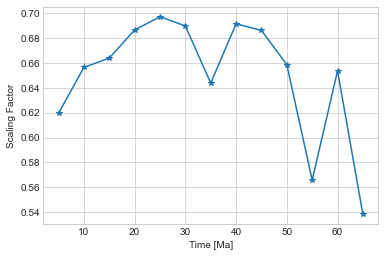

In [84]:
time = [5,10,15,20,25,30,35,40,45,50,55,60,65]
plt.plot(time,SiteHe, '*-')
plt.xlabel('Time [Ma]')
plt.ylabel('Scaling Factor')